In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import time

In [2]:
from calculate_chi_func import chiCalc_custom

In [3]:
t1_635 = np.array([
    np.arange(0.15,0.55+0.004,0.004),
    np.arange(1.0,1.26+0.004,0.004),
    np.arange(1.6,2.0+0.008,0.008),
    np.arange(2.38,2.74+0.012,0.012)
])
numP_635 = np.array([
    np.array([1,4,8,12,16,24,32,40,48,56,64,72,80,88,96,104,120,136,152,168,200]),
    np.array([1,4,8,12,16,24,32,40,48,56,64,72]),
    np.array([1,4,8,12,16,24,32,40,48,56]),
    np.array([1,4,8,12,16,24,32,40,48,56,   72])
])

t1_528 = np.array([
    np.arange(0.20,0.6+0.004,0.004),
    np.arange(1.1,1.5+0.008,0.008),
    np.arange(2.0,2.4+0.01,0.01)
])
numP_528 = np.array([
    np.array([1,4,8,   16,24,32,40,48,56,64,72,80]),
    np.array([1,4,8,12,16,24,32,40,48,56,   72]),
    np.array([1,4,8,12,16,24,32,40,48,56,   72])
])

t1_394 = np.array([
    np.arange(0.25,0.70+0.005,0.005),
    np.arange(1.55,1.95+0.008,0.008),
    np.arange(2.6,3.20+0.015,0.015)
])
numP_394 = np.array([
    np.array([1,4,8,   16,24,32,40,48,56,64,72,80,88,96]),
    np.array([1,4,8,12,16,24,32,40,48,56,   72]),
    np.array([1,4,8,12,16,24,32,40,48,56])
])

t1_309 = np.array([
    np.arange(0.45,1.05+0.01,0.01),
    np.arange(0.15,0.45+0.004,0.004),
    np.arange(1.95,2.40+0.010,0.010),
    np.arange(3.42,4.18+0.020,0.020)
])
numP_309 = np.array([
    np.array([1,4,8,   16,24,32,40,48,56,64]),
    np.array([1,4,8,   16,24,32,40,48,56,64,72,88,96,104,112]),
    np.array([1,4,8,12,16,24,32,40,48,56]),
    np.array([1,4,8,12,16,24,32,40])
])

t1_208 = np.array([
    np.arange(0.25,0.65+0.005,0.005),
    np.arange(0.65,1.55+0.015,0.015),
    np.arange(2.95,3.85+0.020,0.020),
    np.arange(4.90,6.50+0.040,0.040)
])
numP_208 = np.array([
    np.array([1,    4,8,   16,24,32,40,48,56,64,72,80,88,96]),
    np.array([1,2,3,4,8,   16,24,32,40,48]),
    np.array([1,    4,8,12,16,24,32,40]),
    np.array([1,    4,8,12,16,24,32])
])

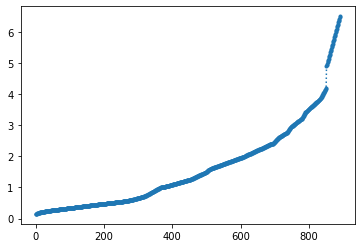

In [4]:
all_t1 = np.unique(np.concatenate(np.concatenate([t1_635,t1_528,t1_394,t1_309,t1_208])))
plt.plot(all_t1,':.')

In [5]:
for data in [t1_635,t1_528,t1_394,t1_309,t1_208]:
    print(np.unique(np.concatenate(data)).shape)

(250,)
(193,)
(184,)
(224,)
(229,)


In [6]:
all_numP = np.concatenate(np.concatenate([numP_635,numP_528,numP_394,numP_309,numP_208]))

ydata,xdata = np.histogram(all_numP, bins=np.arange(all_numP.min(),all_numP.max()+2)) 
#plt.plot(xdata,ydata)
xdata.shape,ydata.shape#np.histogram(all_numP, bins=np.arange(all_numP.min(),all_numP.max()+1)) 

((201,), (200,))

In [7]:
xdata=xdata[:-1]

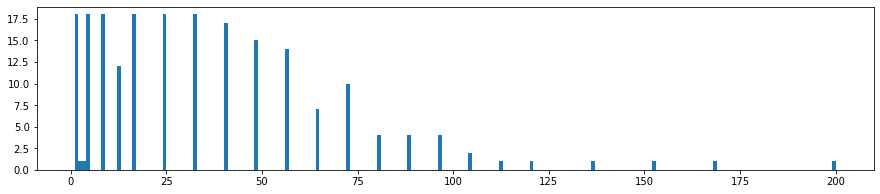

In [8]:
plt.figure(figsize=[15,3])
plt.hist(all_numP,bins=np.arange(all_numP.min(),all_numP.max()+1))
plt.show()

number of points = 193


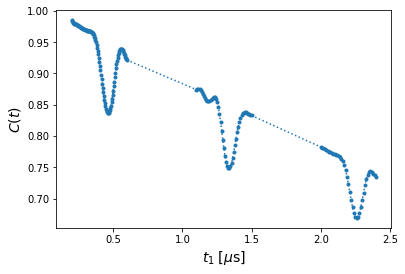

CPU times: user 3.3 s, sys: 0 ns, total: 3.3 s
Wall time: 3.3 s


In [51]:
%%time

showPlot=True #False #
saveData=False #True #

# Parameters of the control field
nN = 8 # Number of pi pulses
t1_vec = np.concatenate(t1_528) # time vector for t1 [µs]
totT_vec = 2*nN*t1_vec # total time vector [µs]
print('number of points =',len(t1_vec))

# NSD function
def funcGauss(x,y0, a,xc,w):
    return y0+a*np.exp(-0.5*((x-2*np.pi*xc)/(2*np.pi*w))**2) #I included a couple of 2*np.pi to convert \nu->

def funcNoise(x,y0,a1,x1,w1): # ,a2,x2,w2 ,a3,x3,w3 ,a4,x4,w4):
    return y0 + funcGauss(x,0,a1,x1,w1) #+ funcGauss(x,0,a2,x2,w2) + funcGauss(x,0,a3,x3,w3) + funcGauss(x,0,a4,x4,w4)

## Function to calculate the distribution of pi pulses for a CPMG sequence
def cpmg(t1,nN):
    seq=np.ones(nN+1)*2*t1
    seq[0]=t1
    seq[-1]=t1
    return seq

# NSD parameters
#νl = 635*1.0705e-3 # B*\gamma [MHZ]
#para=np.array([0.0037, 0.38,νl,0.0085]) # [offset, amplitude, center, width] All in MHz
νl = 520*1.0705e-3 # B*\gamma [MHZ]
para=np.array([0.0080, 0.3,νl,0.004]) #para=np.array([0.0040, 0.48,νl,0.0062]) # [offset, amplitude, center, width] All in MHz


## Calculate chi at every total time
chi = np.zeros(len(totT_vec))
for i,totT in enumerate(totT_vec):
    ## time between pulses
    t1 = totT/(2*nN)
    ## pi pulses distribution
    pulses_times = cpmg(t1,nN).cumsum()[:-1]
    ## calculate chi
    chi[i] = chiCalc_custom(funcNoise,para,totT,pulses_times)

if showPlot:
    plt.plot(t1_vec,np.exp(-chi),'.:',ms=6)
    plt.xlabel(r'$t_1 \; [\mu{\rm s}]$',fontsize=14)
    plt.ylabel(r'$C(t)$',fontsize=14)
    plt.show()

if saveData:
    timestr = time.strftime("%Y%m%d-%H%M%S")
    filename = './data_t1-0.1-5us_n-'+str(nN)+'_'+timestr+'.dat'
    np.savetxt(filename,np.exp(-chi))

In [55]:
# B     = [520,538] steps 2 (10 points)
# W1(σ) = [0.004,0.009] (10 points)
# A     = [0.3,0.7] (10 points)
# y0    = [0.002,0.008] (10 points)

# N = np.array([1,4,8,16,24,32,40,48,56])

t1_vec = np.array([0.2  , 0.204, 0.208, 0.212, 0.216, 0.22 , 0.224, 0.228, 0.232,
                   0.236, 0.24 , 0.244, 0.248, 0.252, 0.256, 0.26 , 0.264, 0.268,
                   0.272, 0.276, 0.28 , 0.284, 0.288, 0.292, 0.296, 0.3  , 0.304,
                   0.308, 0.312, 0.316, 0.32 , 0.324, 0.328, 0.332, 0.336, 0.34 ,
                   0.344, 0.348, 0.352, 0.356, 0.36 , 0.364, 0.368, 0.372, 0.376,
                   0.38 , 0.384, 0.388, 0.392, 0.396, 0.4  , 0.404, 0.408, 0.412,
                   0.416, 0.42 , 0.424, 0.428, 0.432, 0.436, 0.44 , 0.444, 0.448,
                   0.452, 0.456, 0.46 , 0.464, 0.468, 0.472, 0.476, 0.48 , 0.484,
                   0.488, 0.492, 0.496, 0.5  , 0.504, 0.508, 0.512, 0.516, 0.52 ,
                   0.524, 0.528, 0.532, 0.536, 0.54 , 0.544, 0.548, 0.552, 0.556,
                   0.56 , 0.564, 0.568, 0.572, 0.576, 0.58 , 0.584, 0.588, 0.592,
                   0.596, 0.6  , 1.1  , 1.108, 1.116, 1.124, 1.132, 1.14 , 1.148,
                   1.156, 1.164, 1.172, 1.18 , 1.188, 1.196, 1.204, 1.212, 1.22 ,
                   1.228, 1.236, 1.244, 1.252, 1.26 , 1.268, 1.276, 1.284, 1.292,
                   1.3  , 1.308, 1.316, 1.324, 1.332, 1.34 , 1.348, 1.356, 1.364,
                   1.372, 1.38 , 1.388, 1.396, 1.404, 1.412, 1.42 , 1.428, 1.436,
                   1.444, 1.452, 1.46 , 1.468, 1.476, 1.484, 1.492, 1.5  , 2.   ,
                   2.01 , 2.02 , 2.03 , 2.04 , 2.05 , 2.06 , 2.07 , 2.08 , 2.09 ,
                   2.1  , 2.11 , 2.12 , 2.13 , 2.14 , 2.15 , 2.16 , 2.17 , 2.18 ,
                   2.19 , 2.2  , 2.21 , 2.22 , 2.23 , 2.24 , 2.25 , 2.26 , 2.27 ,
                   2.28 , 2.29 , 2.3  , 2.31 , 2.32 , 2.33 , 2.34 , 2.35 , 2.36 ,
                   2.37 , 2.38 , 2.39 , 2.4  ])

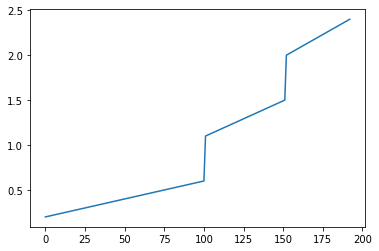

In [56]:
plt.plot(t1_vec)

In [66]:
γ*min(B_lims)-5*max(σ_lims)

0.51166

In [68]:
520*γ,540*γ

(0.55666, 0.5780700000000001)

### Chose the limits (and precision) of $\omega$ in order to estimate the error 

0.1420107364393774

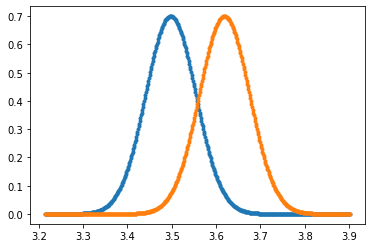

In [132]:
B_lims   = [520,538] #steps 2 (10 points)
σ_lims   = [0.004,0.009] #(10 points)
A_lims   = [0.3,0.7] #(10 points)
y0_lims  = [0.002,0.008] #(10 points)

γ=1.0705e-3 # C-13 nuclear spin gyromagnetic ratio

omega2 = 2*np.pi*np.linspace(γ*min(B_lims)-5*max(σ_lims), γ*max(B_lims)+5*max(σ_lims),500) #

νl = min(B_lims)*γ # B*\gamma [MHZ]
para_A=np.array([0.0, max(A_lims),νl,max(σ_lims)]) # [offset, amplitude, center, width] All in MHz
plt.plot(omega2,funcNoise(omega2,*para_A),':.')

νl = max(B_lims)*γ # B*\gamma [MHZ]
para_B=np.array([0.0, max(A_lims),νl,max(σ_lims)]) # [offset, amplitude, center, width] All in MHz
plt.plot(omega2,funcNoise(omega2,*para_B),':.')

sum(abs(funcNoise(omega2,*para_B)-funcNoise(omega2,*para_A)))*(omega2[1]-omega2[0])

CPU times: user 32 ms, sys: 0 ns, total: 32 ms
Wall time: 27.9 ms


0.037194295844091944

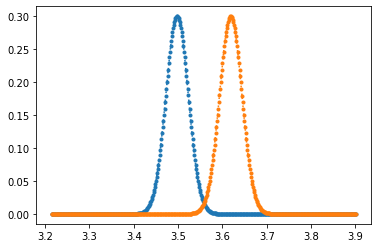

In [134]:
%%time 

B_lims   = [520,538] #steps 2 (10 points)
σ_lims   = [0.004,0.009] #(10 points)
A_lims   = [0.3,0.7] #(10 points)
y0_lims  = [0.002,0.008] #(10 points)

γ=1.0705e-3 # C-13 nuclear spin gyromagnetic ratio

omega2 = 2*np.pi*np.linspace(γ*min(B_lims)-5*max(σ_lims), γ*max(B_lims)+5*max(σ_lims),500)

νl = min(B_lims)*γ # B*\gamma [MHZ]
para_A=np.array([0.0, min(A_lims),νl,min(σ_lims)]) # [offset, amplitude, center, width] All in MHz
plt.plot(omega2,funcNoise(omega2,*para_A),':.')

νl = max(B_lims)*γ # B*\gamma [MHZ]
para_B=np.array([0.0, min(A_lims),νl,min(σ_lims)]) # [offset, amplitude, center, width] All in MHz
plt.plot(omega2,funcNoise(omega2,*para_B),':.')

sum(abs(funcNoise(omega2,*para_B)-funcNoise(omega2,*para_A)))*(omega2[1]-omega2[0])